In [19]:
import os
import ast
import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import griddata


In [28]:
def load_data(angles = [0], type = 'degree' ):
    
     # Add more angles if needed
    rssi_values = []

    # Construct the file path and load data
    for angle in angles:
        file_path = f'RSSI_Data/rssi_list_{angle}_{type}.txt'

        # Check if the file exists
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                for line in f:
                    line = line.strip()
                    try:
                        item = ast.literal_eval(line)
                        rssi_values.append(item)
                    except (ValueError, SyntaxError) as e:
                        print(f"Skipping malformed line in {file_path}: {line} - {e}")
            
        else:
            print(f"File {file_path} does not exist.")


    # Convert the combined list to a numpy array
    points = np.array(rssi_values, dtype=float)

    # Remove rows with any `nan` values
    points = points[~np.isnan(points).any(axis=1)]

    print("Filtered data as numpy array (without `nan` rows):")
    print(points)
    return points

Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e77f0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.2, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e5600>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.3, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e7fd0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.4, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e6860>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.4, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e5c00>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e5b40>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.6, 1.0, nan] - malformed node 

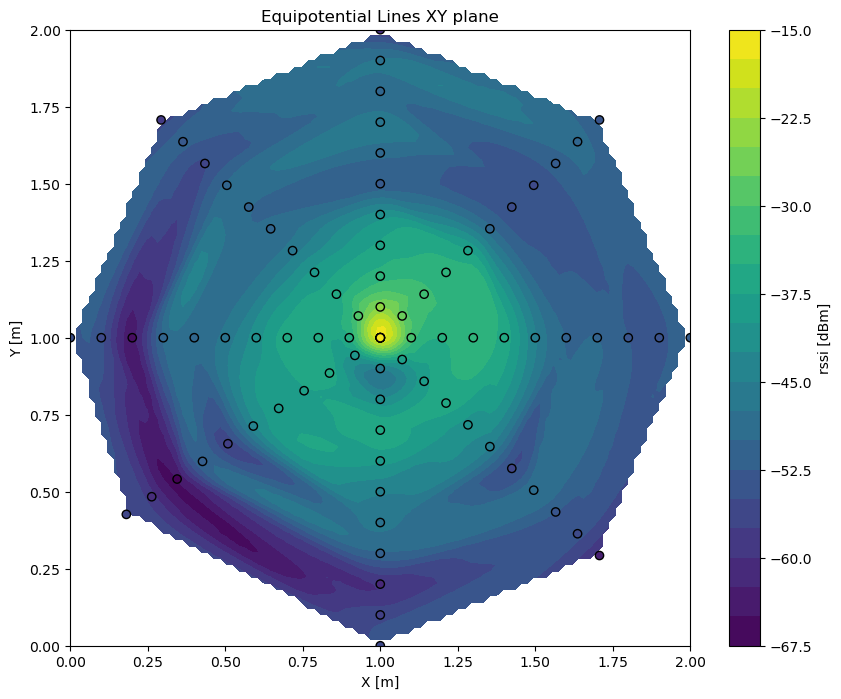

In [31]:
angles = [0,45,90,135,180, 215,270,315] 
path = 'degree'
points = load_data(angles, path)
# Extract x, y, and k values
x = points[:, 0]
y = points[:, 1]
k = points[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data
zi = griddata((x, y), k, (xi, yi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, yi, zi, 20, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp, label = 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, y, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines XY plane')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()

In [32]:
angles = [0,45,90,135,180, 225,270,315]  # Add more angles if needed
path = 'degree_xz'
points = load_data(angles,path)


Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [1.3, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76785e0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a6ebb460>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [2.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76683d0>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_xz.txt: [1.4949747468305832, 1.4949747468305832, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e6440>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_xz.txt: [1.6363961030678928, 1.6363961030678928, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e7400>
Skipping malformed line in RSSI_Data/rssi_list_90_degree_xz.txt: [1.0, 1.5, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76e49d0>
Skipping malf

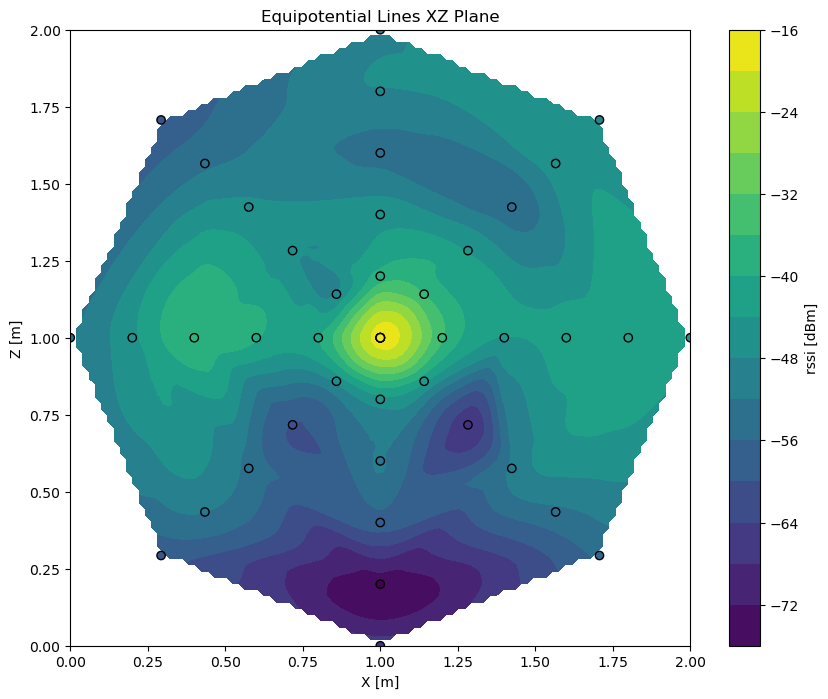

In [33]:

# Extract x, y, and k values
x = points[:, 0]
z = points[:, 1]
k = points[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
zi = np.linspace(min(z), max(z), 100)
xi, zi = np.meshgrid(xi, yi)

# Interpolate the data
rssi = griddata((x, z), k, (xi, zi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, zi, rssi, 15, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp ,label= 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, z, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines XZ Plane')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.show()

In [36]:
angles_yz = [0,45,90,135,180, 225,270,315]  # Add more angles if needed
path_yz = 'degree_yz'

points_yz = load_data(angles_yz, path_yz)

Skipping malformed line in RSSI_Data/rssi_list_0_degree_yz.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a75203a0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_yz.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7523eb0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_yz.txt: [1.9, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a75226e0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_yz.txt: [2.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7782ad0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_yz.txt: [2.2, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7783af0>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_yz.txt: [1.0707106781186548, 1.0707106781186548, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7781a80>
Skipping malformed line in RSSI_Data/rssi_lis

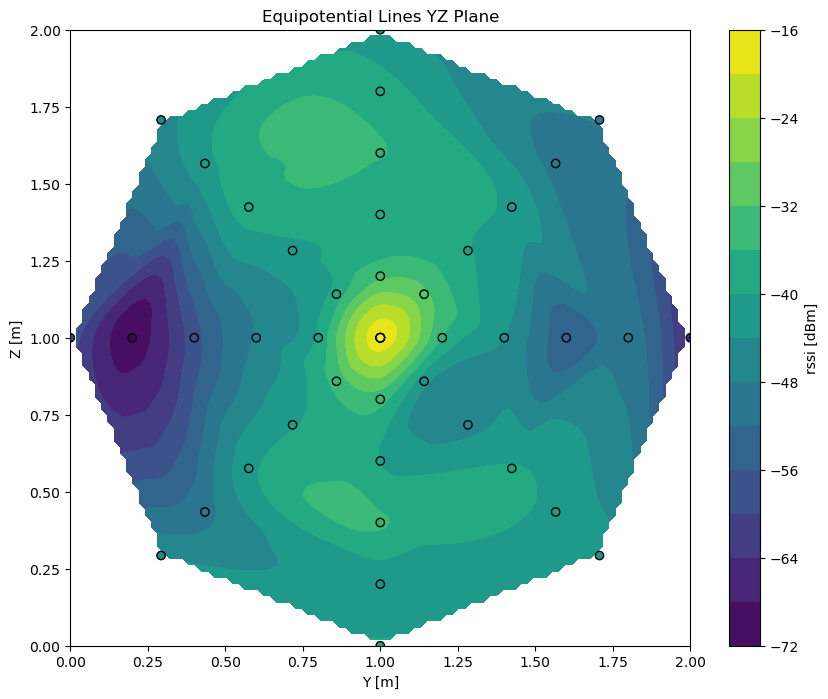

In [37]:

# Extract x, y, and k values
y = points_yz[:, 0]
z = points_yz[:, 1]
k = points_yz[:, 2]

# Create grid values first
yi = np.linspace(min(y), max(y), 100)
zi = np.linspace(min(z), max(z), 100)
yi, zi = np.meshgrid(yi, yi)

# Interpolate the data
rssi = griddata((y, z), k, (yi, zi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(yi, zi, rssi, 15, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp ,label= 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(y, z, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines YZ Plane')
plt.xlabel('Y [m]')
plt.ylabel('Z [m]')
plt.show()

In [38]:
angles_beacon = [0,315,270, 45,90] 
path_beacon =  'degree_beacon_antenna_angle'

points_beacon = load_data(angles_beacon, path_beacon)

Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7755ab0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7187520>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.6, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a71879d0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76cbf70>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.8, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a76cad40>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast

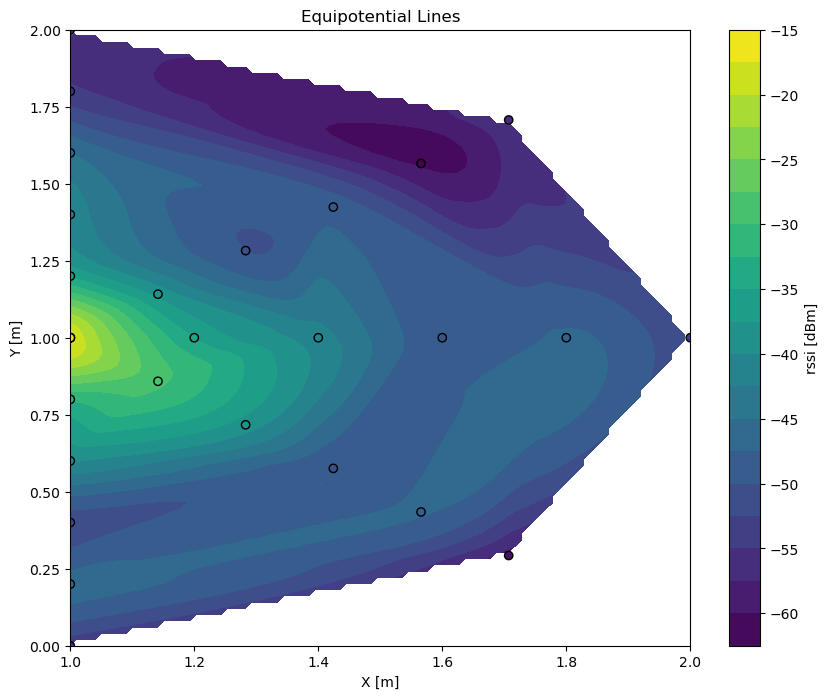

In [39]:
x = points_beacon[:,0]
# Extract x, y, and k values
x = points_beacon[:, 0]
y = points_beacon[:, 1]
k = points_beacon[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data
zi = griddata((x, y), k, (xi, yi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, yi, zi, 20, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp, label = 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, y, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()

Skipping malformed line in RSSI_Data/rssi_list_0_degree_b2b.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a74d5840>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_b2b.txt: [1.9, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7184610>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_b2b.txt: [1.2121320343559643, 1.2121320343559643, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a74d41f0>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_b2b.txt: [1.6363961030678928, 1.6363961030678928, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a74d6a40>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_b2b.txt: [1.7778174593052025, 1.7778174593052023, nan] - malformed node or string on line 1: <ast.Name object at 0x7b06a7185870>
Skipping malformed line in RSSI_Data/rssi_list_90_degree_b2b.txt: [1.0, 1.5, nan] - malformed node or string on line 1: <ast.Name ob

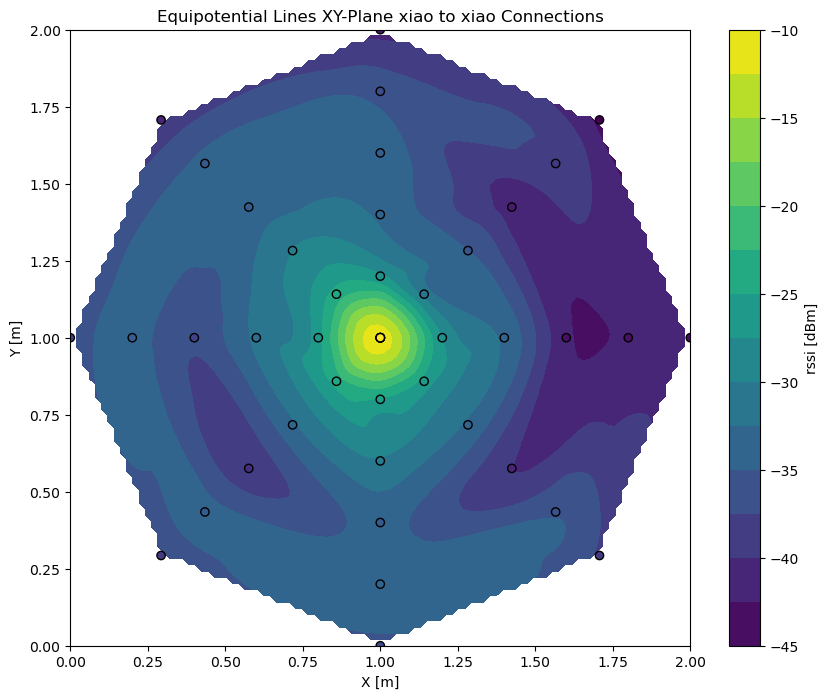

In [40]:
angles_b2b = [0,45,90,135,180, 225,270,315]  # Add more angles if needed
path_b2b = 'degree_b2b'

points_b2b = load_data(angles_b2b, path_b2b)

x = points_b2b[:, 0]
y = points_b2b[:, 1]
k = points_b2b[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data
zi = griddata((x, y), k, (xi, yi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, yi, zi, 15, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp, label = 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, y, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines XY-Plane xiao to xiao Connections')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()